In [2]:
from google.colab import drive
drive.mount("/content/drive")
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Bangla Song Dataset/spam-text.csv')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data.Category.value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [4]:
sample_data = [100,200,300,400,1000,1500,2000,2500,3000,3500,4000]
for i in sample_data:
      print(data.Message[i],'\n','Message:-- ',data.Category[i],'\n')


Please don't text me anymore. I have nothing else to say. 
 Message:--  ham 

Found it, ENC  &lt;#&gt; , where you at? 
 Message:--  ham 

Need a coffee run tomo?Can't believe it's that time of week already 
 Message:--  ham 

Hmmm...k...but i want to change the field quickly da:-)i wanna get system administrator or network administrator.. 
 Message:--  ham 

Aight will do, thanks again for comin out 
 Message:--  ham 

SMS. ac JSco: Energy is high, but u may not know where 2channel it. 2day ur leadership skills r strong. Psychic? Reply ANS w/question. End? Reply END JSCO 
 Message:--  spam 

LMAO where's your fish memory when I need it? 
 Message:--  ham 

Yup i've finished c ü there... 
 Message:--  ham 

Oh, then your phone phoned me but it disconnected 
 Message:--  ham 

I hope you arnt pissed off but id would really like to see you tomorrow. Love me xxxxxxxxxxxxxX 
 Message:--  ham 

K...k...when will you give treat? 
 Message:--  ham 



In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
def calc_gram_tfidf(headline,gram):

    tfidf = TfidfVectorizer(ngram_range=gram,use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(headline)
    
    return tfidf,X

In [6]:
from sklearn.preprocessing import LabelEncoder
def label_encoding(category,bool):
    le = LabelEncoder()
    le.fit(category)
    encoded_labels = le.transform(category)
    labels = np.array(encoded_labels) # Converting into numpy array
    class_names =le.classes_ ## Define the class names again
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in range(4000):
            
            if encoded_labels[i] == 21:
              print(encoded_labels[i],"->>" ,category[i])

    return labels

In [7]:
def dataset_split(feature_space,category):

    X_train,X_test,y_train,y_test = train_test_split(feature_space,category,train_size = 0.9,
                                                  test_size = 0.1,random_state =0)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])
  
    return X_train,X_test,y_train,y_test

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
tfidf,feature = calc_gram_tfidf(data.Message,(1,1))
labels = label_encoding(data.Category,True)
X_train,X_test,y_train,y_test = dataset_split(feature,labels)


			===== Label Encoding ===== 
Class Names:--> ['ham' 'spam']
Feature Size :======> 13574

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 5572 
	Training		 5014 
	Test			 558


In [10]:
labels

array([0, 0, 1, ..., 0, 0, 0])

In [11]:
lr_model = LogisticRegression(solver = 'lbfgs', max_iter= 400, random_state = 123)
lr_model.fit(X_train,y_train)
pred_y = lr_model.predict(X_test)

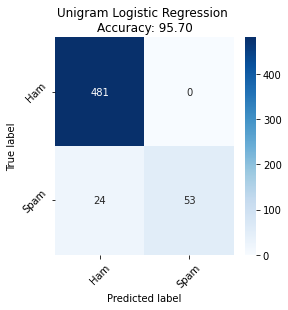

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test, pred_y) 
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     
                     index = ['Ham','Spam'], 
                     columns = ['Ham','Spam'])

plt.figure(figsize=(4,4))
sns.heatmap(cm_df, annot=True,cmap="Blues", fmt='g')
plt.title('Unigram Logistic Regression \nAccuracy: {0:.2f}'.format(accuracy_score(y_test, pred_y)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [13]:
report = pd.DataFrame(classification_report(y_true = y_test, y_pred = pred_y, output_dict=True)).transpose()
report = report.rename(index={'0': 'Ham','1':'Spam'})
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
report

,precision,recall,f1-score,support
Ham,95.25,100.00,97.57,481.000000
Spam,100.00,68.83,81.54,77.000000
accuracy,95.70,95.70,95.70,0.956989
macro avg,97.62,84.42,89.55,558.000000
weighted avg,95.90,95.70,95.35,558.000000


In [14]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
pred_y = dt_model.predict(X_test)


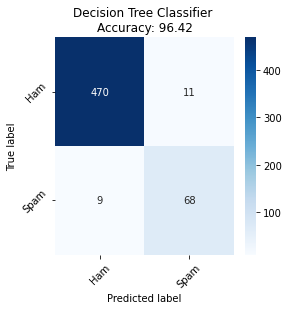

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test, pred_y) 
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     
                     index = ['Ham','Spam'], 
                     columns = ['Ham','Spam'])

plt.figure(figsize=(4,4))
sns.heatmap(cm_df, annot=True,cmap="Blues", fmt='g')
plt.title('Decision Tree Classifier \nAccuracy: {0:.2f}'.format(accuracy_score(y_test, pred_y)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [16]:
report = pd.DataFrame(classification_report(y_true = y_test, y_pred = pred_y, output_dict=True)).transpose()
report = report.rename(index={'0': 'Ham','1':'Spam'})
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
report

,precision,recall,f1-score,support
Ham,98.12,97.71,97.92,481.000000
Spam,86.08,88.31,87.18,77.000000
accuracy,96.42,96.42,96.42,0.964158
macro avg,92.10,93.01,92.55,558.000000
weighted avg,96.46,96.42,96.44,558.000000


In [17]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
pred_y = rf_model.predict(X_test)

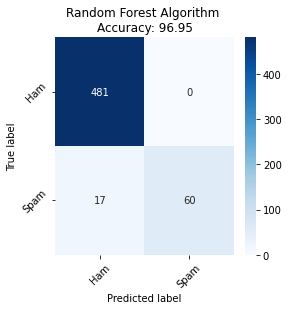

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test, pred_y) 
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     
                     index = ['Ham','Spam'], 
                     columns = ['Ham','Spam'])

plt.figure(figsize=(4,4))
sns.heatmap(cm_df, annot=True,cmap="Blues", fmt='g')
plt.title('Random Forest Algorithm \nAccuracy: {0:.2f}'.format(accuracy_score(y_test, pred_y)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [19]:
report = pd.DataFrame(classification_report(y_true = y_test, y_pred = pred_y, output_dict=True)).transpose()
report = report.rename(index={'0': 'Ham','1':'Spam'})
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
report

,precision,recall,f1-score,support
Ham,96.59,100.00,98.26,481.000000
Spam,100.00,77.92,87.59,77.000000
accuracy,96.95,96.95,96.95,0.969534
macro avg,98.29,88.96,92.93,558.000000
weighted avg,97.06,96.95,96.79,558.000000


In [20]:
mnb_model = MultinomialNB()
mnb_model.fit(X_train,y_train)
pred_y = mnb_model.predict(X_test)

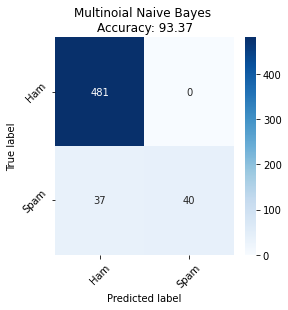

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test, pred_y) 
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     
                     index = ['Ham','Spam'], 
                     columns = ['Ham','Spam'])

plt.figure(figsize=(4,4))
sns.heatmap(cm_df, annot=True,cmap="Blues", fmt='g')
plt.title('Multinoial Naive Bayes \nAccuracy: {0:.2f}'.format(accuracy_score(y_test, pred_y)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [22]:
report = pd.DataFrame(classification_report(y_true = y_test, y_pred = pred_y, output_dict=True)).transpose()
report = report.rename(index={'0': 'Ham','1':'Spam'})
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
report

,precision,recall,f1-score,support
Ham,92.86,100.00,96.30,481.000000
Spam,100.00,51.95,68.38,77.000000
accuracy,93.37,93.37,93.37,0.933692
macro avg,96.43,75.97,82.34,558.000000
weighted avg,93.84,93.37,92.44,558.000000


In [23]:
knc_model = KNeighborsClassifier()
knc_model.fit(X_train,y_train)
pred_y = knc_model.predict(X_test)

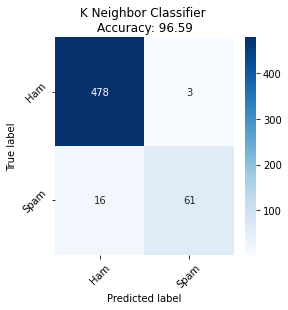

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test, pred_y) 
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     
                     index = ['Ham','Spam'], 
                     columns = ['Ham','Spam'])

plt.figure(figsize=(4,4))
sns.heatmap(cm_df, annot=True,cmap="Blues", fmt='g')
plt.title('K Neighbor Classifier \nAccuracy: {0:.2f}'.format(accuracy_score(y_test, pred_y)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [25]:
report = pd.DataFrame(classification_report(y_true = y_test, y_pred = pred_y, output_dict=True)).transpose()
report = report.rename(index={'0': 'Ham','1':'Spam'})
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
report

,precision,recall,f1-score,support
Ham,96.76,99.38,98.05,481.00000
Spam,95.31,79.22,86.52,77.00000
accuracy,96.59,96.59,96.59,0.96595
macro avg,96.04,89.30,92.29,558.00000
weighted avg,96.56,96.59,96.46,558.00000
